 **This is a notebook for the AICP Internship Task of app user segmentation, we need to group users based on how they engage with the app**

# Features in the Dataset
1.userid: The identity number of the user;  
2.Average Screen Time: The average screen time of the user on the application;   
3.Average Spent on App (INR): The average amount spent by the user on the application;   
4.Left Review: Did the user leave any reviews about the experience on the application? (1 if true, otherwise 0)   
5.Ratings: Ratings given by the user to the application;   
6.New Password Request: The number of times the user requested a new password;   
7.Last Visited Minutes: Minuted passed by when the user was last active;   
8.Status: Installed if the application is installed and uninstalled if the user has deleted the application  

In [50]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans


In [25]:
# Import the df
df = pd.read_csv('userbehaviour.csv')

In [68]:
df.head(5)

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Cluster
0,1001,17.0,634.0,1,9,7,2990,Installed,Retained
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,Churn
2,1003,37.0,207.0,0,8,5,971,Installed,Retained
3,1004,32.0,445.0,1,6,2,799,Installed,Retained
4,1005,45.0,427.0,1,5,6,3668,Installed,Retained


**Q.1: Import data and check null values, column info, and descriptive statistics of the data.**

In [26]:
# Check for null values
null_values = df.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64


In [27]:
# Get column information
column_info = df.info()
print("\nColumn Information:\n", column_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB

Column Information:
 None


In [28]:
# Descriptive statistics
statistics = df.describe()
print("\nDescriptive Statistics:\n", statistics)


Descriptive Statistics:
             userid  Average Screen Time  Average Spent on App (INR)  \
count   999.000000           999.000000                  999.000000   
mean   1500.000000            24.390390                  424.415415   
std     288.530761            14.235415                  312.365695   
min    1001.000000             0.000000                    0.000000   
25%    1250.500000            12.000000                   96.000000   
50%    1500.000000            24.000000                  394.000000   
75%    1749.500000            36.000000                  717.500000   
max    1999.000000            50.000000                  998.000000   

       Left Review     Ratings  New Password Request  Last Visited Minutes  
count   999.000000  999.000000            999.000000            999.000000  
mean      0.497497    6.513514              4.941942           5110.898899  
std       0.500244    2.701511              2.784626           8592.036516  
min       0.000000    0.00

**Q.2: Check the highest, lowest, and average screen time of all the users.**

In [29]:
# Highest screen time
highest_screen_time = df['Average Screen Time'].max()
print("Highest Screen Time:", highest_screen_time)

Highest Screen Time: 50.0


In [30]:
# Lowest screen time
lowest_screen_time = df['Average Screen Time'].min()
print("Lowest Screen Time:", lowest_screen_time)

Lowest Screen Time: 0.0


In [31]:
# Average screen time
average_screen_time = df['Average Screen Time'].mean()
print("Average Screen Time:", average_screen_time)

Average Screen Time: 24.39039039039039


**Q.3: Check the highest, lowest, and average amount spent by all the users.**

In [32]:
# Highest amount spent
highest_amount_spent = df['Average Spent on App (INR)'].max()
print("Highest Amount Spent:", highest_amount_spent)


Highest Amount Spent: 998.0


In [33]:
# Lowest amount spent
lowest_amount_spent = df['Average Spent on App (INR)'].min()
print("Lowest Amount Spent:", lowest_amount_spent)

Lowest Amount Spent: 0.0


In [34]:
# Average amount spent
average_amount_spent = df['Average Spent on App (INR)'].mean()
print("Average Amount Spent:", average_amount_spent)

Average Amount Spent: 424.4154154154154


**Q.4: check the relationship between the spending capacity and screen time of the active users and the users who have uninstalled the app.**

In [54]:
# Filter active users and uninstalled users
active_users = df[df['Status'] == 'Installed']
uninstalled_users = df[df['Status'] == 'Uninstalled']


In [65]:
# Scatter plot for active users
active_fig = px.scatter(active_users, x='Average Screen Time', y='Average Spent on App (INR)', 
                        trendline="ols",  # Adding trendline for linear regression
                        color_discrete_sequence=['blue']  # Set color for active users to blue
                        )
active_fig.update_traces(name='Active Users', showlegend=True, legendgroup='Status')

# Scatter plot for uninstalled users
uninstalled_fig = px.scatter(uninstalled_users, x='Average Screen Time', y='Average Spent on App (INR)', 
                             trendline="ols",  # Adding trendline for linear regression
                             color_discrete_sequence=['orange']  # Set color for uninstalled users to orange
                             )
uninstalled_fig.update_traces(name='Uninstalled Users', showlegend=True, legendgroup='Status')

# Combine the plots
combined_fig = go.Figure(data=active_fig.data + uninstalled_fig.data)

# Show the plot
combined_fig.update_layout(title='Relationship between Spending Capacity and Screen Time',
                           legend_title='Status',
                           xaxis_title='Average Screen Time',
                           yaxis_title='Average Spent on App (INR)')
combined_fig.show()


# Obversavation of this graph 
This graph show that user who uninstall app have average screen time less than 10 and average spend on app(INR) is less than 100 and status show that most of the users are active as there is less amount of user who uninstall the app

**Q.5:check the relationship between the ratings given by users and the average screen time. Also, explain the observation.**

In [62]:
# Create scatter plot with trendline
scatter_plot = px.scatter(df, x='Average Screen Time', y='Ratings', color='Status', 
                          labels={'Ratings': 'Ratings', 'Average Screen Time': 'Average Screen Time'},
                          title='Relationship between Ratings and Average Screen Time',
                          color_discrete_sequence=['blue', 'orange'],  # Customize colors for each status
                          trendline='ols'  # Adding trendline for linear regression
                          )

# Show the plot
scatter_plot.show()


# Observation of this graph 
This graph shows that app whose Rating is equal to and greater than 5 and average screen time is more than 10 these are remain install in the user mobile and if the ratings is below 5 and average screen time is less than 5 then user uninstall those apps

**Q.6: Now move forward to App User segmentation to find the users that the app retained and lost forever**

In [66]:
# Select relevant features for clustering
features = df[['Average Screen Time', 'Average Spent on App (INR)',
               'Left Review', 'Ratings', 'New Password Request',
               'Last Visited Minutes']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as per your requirement
kmeans.fit(features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Map cluster labels to meaningful names
cluster_names = {
    0: 'Retained',
    1: 'Needs Attention',
    2: 'Churn'
}

# Rename cluster labels using the mapping dictionary
cluster_labels_named = [cluster_names[label] for label in cluster_labels]

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels_named

# Number of segments
num_segments = len(df['Cluster'].unique())
print("Number of Segments:", num_segments)


Number of Segments: 3


C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Q.7: Now visualize the segments.**

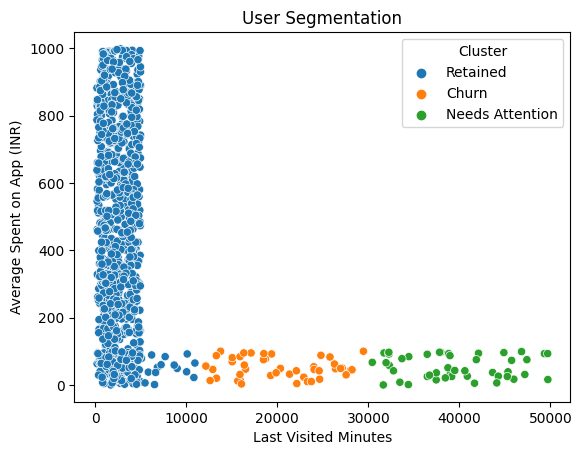

In [67]:
sns.scatterplot(x='Last Visited Minutes', y='Average Spent on App (INR)', hue='Cluster', data=df)
plt.title('User Segmentation')
plt.show()

# Summary of this Working
1) This dataset is about app user segmentation.   
2) The dataset has no null values, so we do not need to clean the data.   
3) From descriptive statistics, we gather insights that in the "Left Review" column, 50% of users do not give reviews about the application.  
4) In question 2 of this notebook, I explored the highest, lowest, and average screen time of all users.  
5) In question 3, I examined the highest, lowest, and average amount spent by all users.
By plotting the scatter plot, I gained insight into the average screen time and average spend on the app. In the second graph, I learned about the relationship between average screen time and ratings.   
6) In the last segment, I applied the ML model of K-means to make clusters of users based on the last time visited and average spend on the app. I found that users whose average spend time is more than 100 and last visited minutes are around 10k are the retained users, while others fall into the categories of needing attention and churn. "Churn" refers to users whose last visit time is more than 29k.  
7) The results from the clustering analysis provided insights into user behavior and can be used to devise appropriate strategies for retaining users.

